<a href="https://colab.research.google.com/github/mitalibelge/NNDL-Lab/blob/main/ChurnBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implementation of Customer Churn Bank Prediction**

**Aim:** To predict customer churn using ANN for the Dataset of the bank

**Theory:**

To build the artificial neural network that will forecast client attrition. First and leading, we will want a dataset on which to run our plan of action.

So we will start with the dataset, we will use the telecom customer churn dataset which was taken from the kaggle. The dataset contains several features based on those features we have to predict the customer churn.

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("/content/ChurnBank.csv")
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6311,6312,15798429,Hernandez,741,France,Male,29,8,0.00,2,1,1,115994.52,0
9232,9233,15635364,Gray,618,France,Female,49,9,44301.43,3,1,1,89729.30,1
3098,3099,15628523,Chien,539,France,Female,24,3,0.00,2,1,1,198161.07,0
5936,5937,15773723,Duncan,588,Spain,Female,22,9,67178.19,1,1,1,163534.75,1
337,338,15648064,Kennedy,649,France,Male,33,2,0.00,2,1,0,2010.98,0
7931,7932,15751227,Ebelegbulam,807,France,Male,47,1,95120.59,1,0,0,127875.10,0
4654,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1
4255,4256,15596228,Uwaezuoke,490,France,Male,29,4,0.00,2,1,0,32089.57,0
2516,2517,15798666,Hughes,814,France,Female,36,6,0.00,2,1,1,98657.01,0
6899,6900,15700263,Ifeatu,569,France,Male,66,2,0.00,1,1,0,130784.20,1


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [ ]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1002,725,Germany,Male,39,1,50880.98,2,1,1,184023.54,0
511,632,Germany,Female,38,6,86569.76,2,1,0,98090.91,0
8691,698,France,Female,39,4,0.00,2,0,1,47455.82,0
4544,673,Spain,Male,39,8,138160.00,1,1,1,110468.51,0
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77,0


In [ ]:
df['Geography'].nunique()

3

In [ ]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6171,617,Spain,0,61,3,113858.95,1,1,1,38129.22,0
5353,592,Spain,0,35,6,80285.16,1,1,0,72678.75,1
6134,699,Spain,1,25,8,0.00,2,1,1,52404.47,0
5760,528,Spain,0,23,7,104744.89,1,1,0,170262.97,0
9100,659,France,0,35,6,0.00,2,1,1,58879.11,0
4801,823,France,0,71,5,149105.08,1,0,1,162683.06,0
4198,612,Spain,0,35,1,0.00,1,1,1,83256.26,1
4291,779,France,0,32,10,80728.15,1,1,0,86306.75,0
1207,752,Germany,0,30,4,81523.38,1,1,1,36885.85,0
6123,465,Spain,1,33,6,0.00,2,1,1,95500.98,0


In [ ]:
df[df.Exited==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,0,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,0,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,1,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,1,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1


In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [ ]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2459,576,0,63,9,70655.48,1,0,0,78955.80,1,1,0,0
8217,605,0,75,2,61319.63,1,0,1,186655.11,0,0,1,0
3266,537,0,30,1,103138.17,1,1,1,96555.42,0,0,0,1
6519,669,1,50,4,112650.89,1,0,0,166386.22,1,0,1,0
176,510,1,30,0,0.00,2,1,1,130553.47,0,1,0,0
7691,568,1,38,3,132951.92,1,0,1,124486.28,0,1,0,0
7932,850,0,40,8,102800.65,1,1,0,60811.56,0,1,0,0
2673,601,0,50,2,115625.07,1,1,0,185855.21,0,1,0,0
6819,568,0,39,5,0.00,2,1,1,129569.92,0,0,0,1
915,596,0,47,6,0.00,1,1,0,74835.65,0,1,0,0


In [ ]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


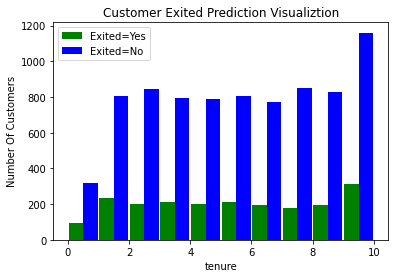

In [ ]:
exited_no = df1[df1.Exited==0].Tenure
exited_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','blue'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


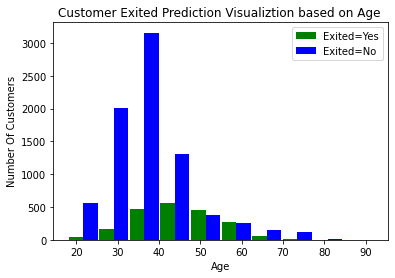

In [ ]:
exited_no = df1[df1.Exited==0].Age
exited_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','blue'],label=['Exited=Yes','Exited=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


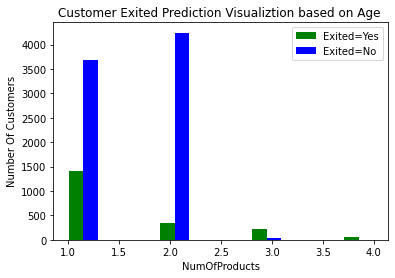

In [ ]:
exited_no = df1[df1.Exited==0].NumOfProducts
exited_yes = df1[df1.Exited==1].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_yes,exited_no], rwidth=0.95, color=['green','blue'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5834,0.886,0,0.189189,0.2,0.000000,0.333333,1,0,0.969123,1,1,0,0
5755,0.734,0,0.432432,0.9,0.359930,0.000000,1,1,0.623134,0,1,0,0
9104,0.612,1,0.216216,0.6,0.238652,0.000000,1,0,0.070112,1,0,0,1
4586,0.504,1,0.094595,0.0,0.000000,0.333333,1,1,0.506361,0,1,0,0
6969,0.538,1,0.270270,0.6,0.000000,0.333333,1,1,0.588080,0,0,0,1
2392,0.598,0,0.445946,0.4,0.000000,0.000000,1,1,0.751967,0,0,0,1
7823,0.710,0,0.189189,0.7,0.000000,0.333333,1,0,0.039554,0,1,0,0
7375,0.578,0,0.797297,0.6,0.322545,0.333333,1,1,0.279115,0,1,0,0
2361,0.672,1,0.337838,0.5,0.617168,0.333333,1,1,0.759533,0,0,1,0
5364,0.924,0,0.202703,0.2,0.506796,0.333333,0,1,0.526910,0,0,1,0


In [ ]:
df1.shape

(10000, 13)

In [ ]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5177 - accuracy: 0.7738
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7969
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.8029
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8111
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8148
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8160
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8196
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4111 - accura

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8520


[0.35195818543434143, 0.8519999980926514]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.03512493],
       [0.05973977],
       [0.06215301],
       [0.05340475],
       [0.06031772]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.74      0.41      0.53       405

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

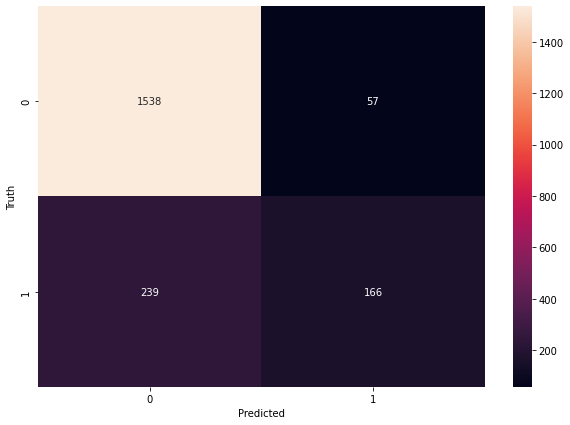

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
round((1520+192)/(1520+192+75+213),2)

0.86

**Precision for customers who did not churn**

In [ ]:
round(1520/(1520+192),2)

0.89

**Precision for customers who actually churned**

In [ ]:
round(192/(192+75),2)

0.72

In [ ]:
round(1520/(1520+75),2)

0.95

In [ ]:
round(192/(213+192),2)

0.47

**Conclusion:**

To predict customer churn using ANN for the Dataset of the bank